# Human Cognitive Performance
Dataset: https://www.kaggle.com/datasets/samxsam/human-cognitive-performance-analysis

## Import Libraries & Dataset

In [112]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [113]:
# Import data
df = pd.read_csv('human_cognitive_performance.csv')
df.head()

User_ID  Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0      U1   57  Female             6.5             3  Non-Vegetarian   
1      U2   39  Female             7.6             9  Non-Vegetarian   
2      U3   26    Male             8.2             6      Vegetarian   
3      U4   32    Male             7.8             9      Vegetarian   
4      U5   50    Male             9.7             2  Non-Vegetarian   

   Daily_Screen_Time Exercise_Frequency  Caffeine_Intake  Reaction_Time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   Memory_Test_Score  Cognitive_Score  AI_Predicted_Score  
0                 65            36.71               39.77  
1                 58            54.35               57.68  
2                 49            32.57               29.54  
3                 94            70.15               74.59  
4                 62            87.54               91.78

## Initial Cleaning & EDA

In [114]:
df.shape

(80000, 13)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [116]:
df.describe()

Age  Sleep_Duration  Stress_Level  Daily_Screen_Time  \
count  80000.000000    80000.000000  80000.000000       80000.000000   
mean      38.525525        7.005332      5.493762           6.504646   
std       12.101876        1.734435      2.865308           3.167072   
min       18.000000        4.000000      1.000000           1.000000   
25%       28.000000        5.500000      3.000000           3.800000   
50%       39.000000        7.000000      5.000000           6.500000   
75%       49.000000        8.500000      8.000000           9.200000   
max       59.000000       10.000000     10.000000          12.000000   

       Caffeine_Intake  Reaction_Time  Memory_Test_Score  Cognitive_Score  \
count     80000.000000   80000.000000       80000.000000     80000.000000   
mean        248.988213     399.973579          69.498350        58.172395   
std         144.541990     115.369329          17.305659        23.058522   
min           0.000000     200.000000          40.000000         0.000000   
25%         123.000000     300.150000          55.000000        40.910000   
50%         249.000000     400.360000          70.000000        58.360000   
75%         375.000000     499.250000          85.000000        75.830000   
max         499.000000     599.990000          99.000000       100.000000   

       AI_Predicted_Score  
count        80000.000000  
mean            58.121357  
std             23.119598  
min              0.000000  
25%             40.850000  
50%             58.360000  
75%             75.890000  
max            100.000000

In [117]:
df.duplicated().sum()

np.int64(0)

In [118]:
df.head()

User_ID  Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0      U1   57  Female             6.5             3  Non-Vegetarian   
1      U2   39  Female             7.6             9  Non-Vegetarian   
2      U3   26    Male             8.2             6      Vegetarian   
3      U4   32    Male             7.8             9      Vegetarian   
4      U5   50    Male             9.7             2  Non-Vegetarian   

   Daily_Screen_Time Exercise_Frequency  Caffeine_Intake  Reaction_Time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   Memory_Test_Score  Cognitive_Score  AI_Predicted_Score  
0                 65            36.71               39.77  
1                 58            54.35               57.68  
2                 49            32.57               29.54  
3                 94            70.15               74.59  
4                 62            87.54               91.78

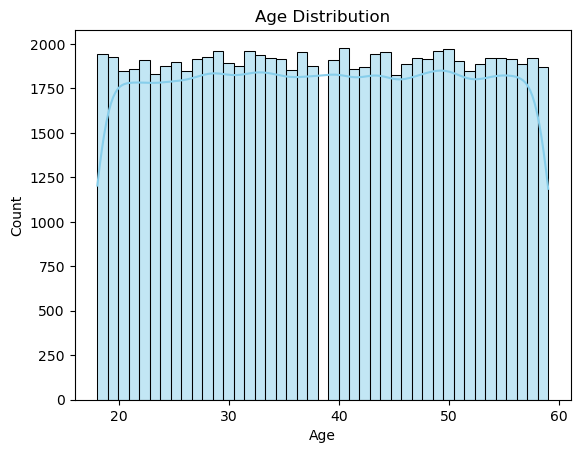

In [119]:
# View age distribution
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

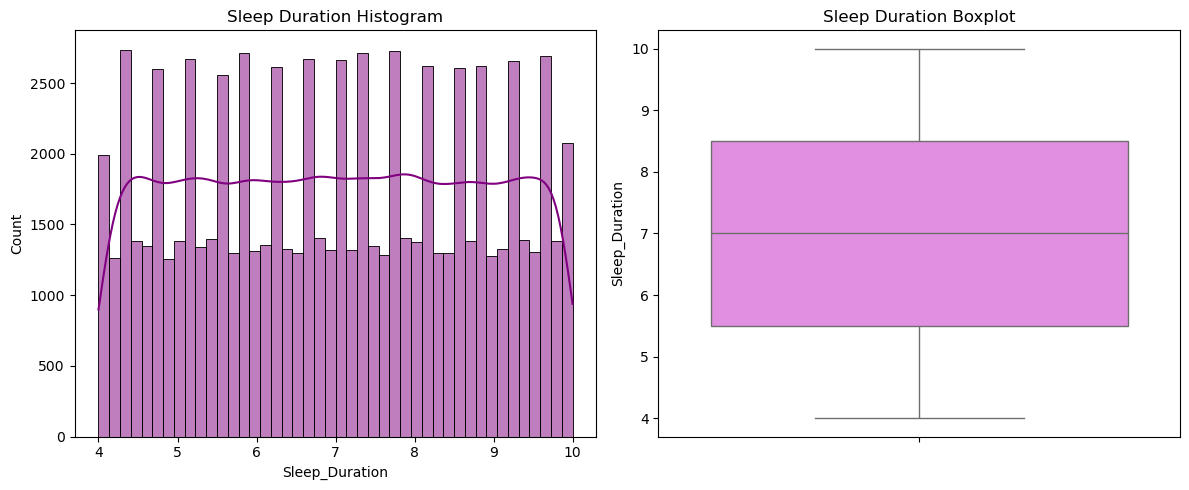

In [120]:
# View sleep duration distribution
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Sleep_Duration'], kde=True, ax=axs[0], color='purple')
axs[0].set_title("Sleep Duration Histogram")

sns.boxplot(y=df['Sleep_Duration'], ax=axs[1], color='violet')
axs[1].set_title("Sleep Duration Boxplot")
plt.tight_layout()
plt.show()

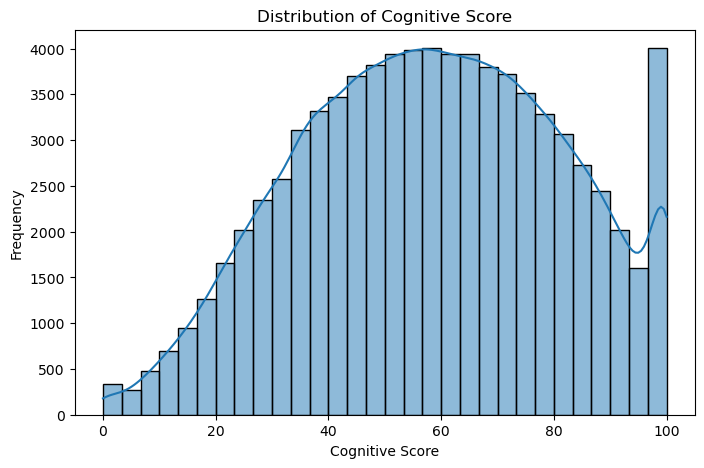

In [121]:
# View Score distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Cognitive_Score'], kde=True, bins=30)
plt.title("Distribution of Cognitive Score")
plt.xlabel("Cognitive Score")
plt.ylabel("Frequency")
plt.show()

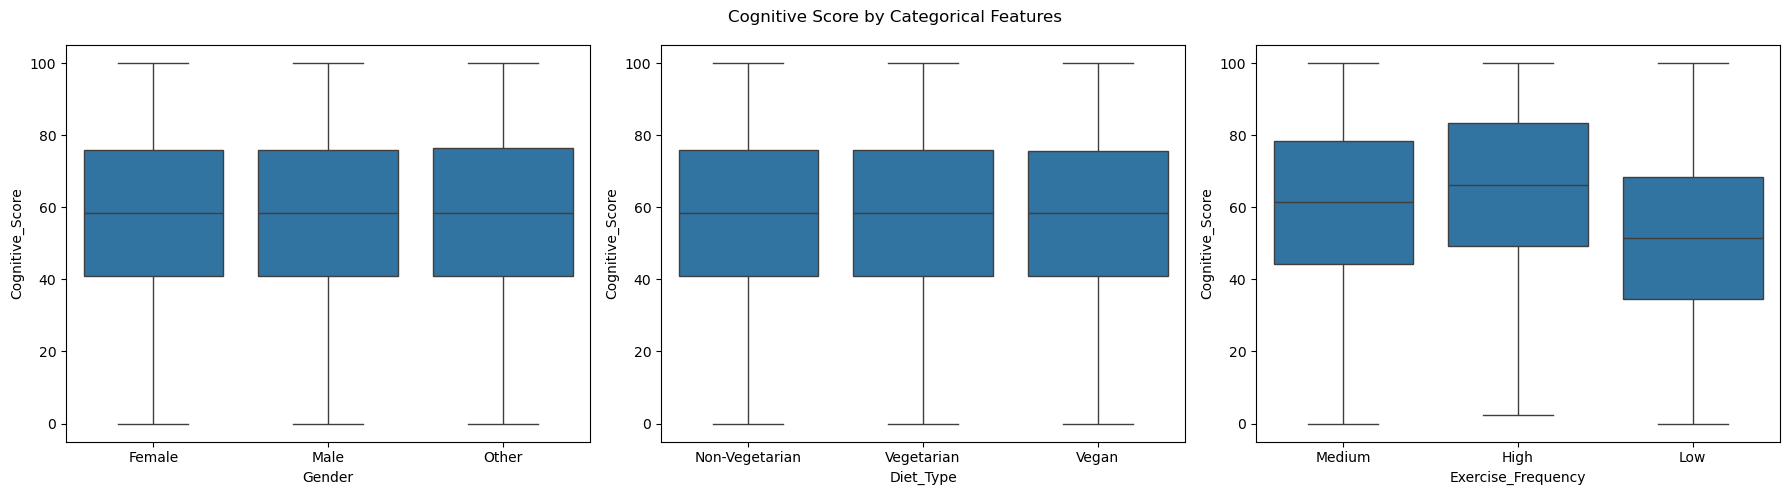

In [122]:
# Boxplots for cog score of categorical features
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x="Gender", y="Cognitive_Score", data=df, ax=axs[0])
sns.boxplot(x="Diet_Type", y="Cognitive_Score", data=df, ax=axs[1])
sns.boxplot(x="Exercise_Frequency", y="Cognitive_Score", data=df, ax=axs[2])
fig.suptitle("Cognitive Score by Categorical Features")
plt.tight_layout()
plt.show()

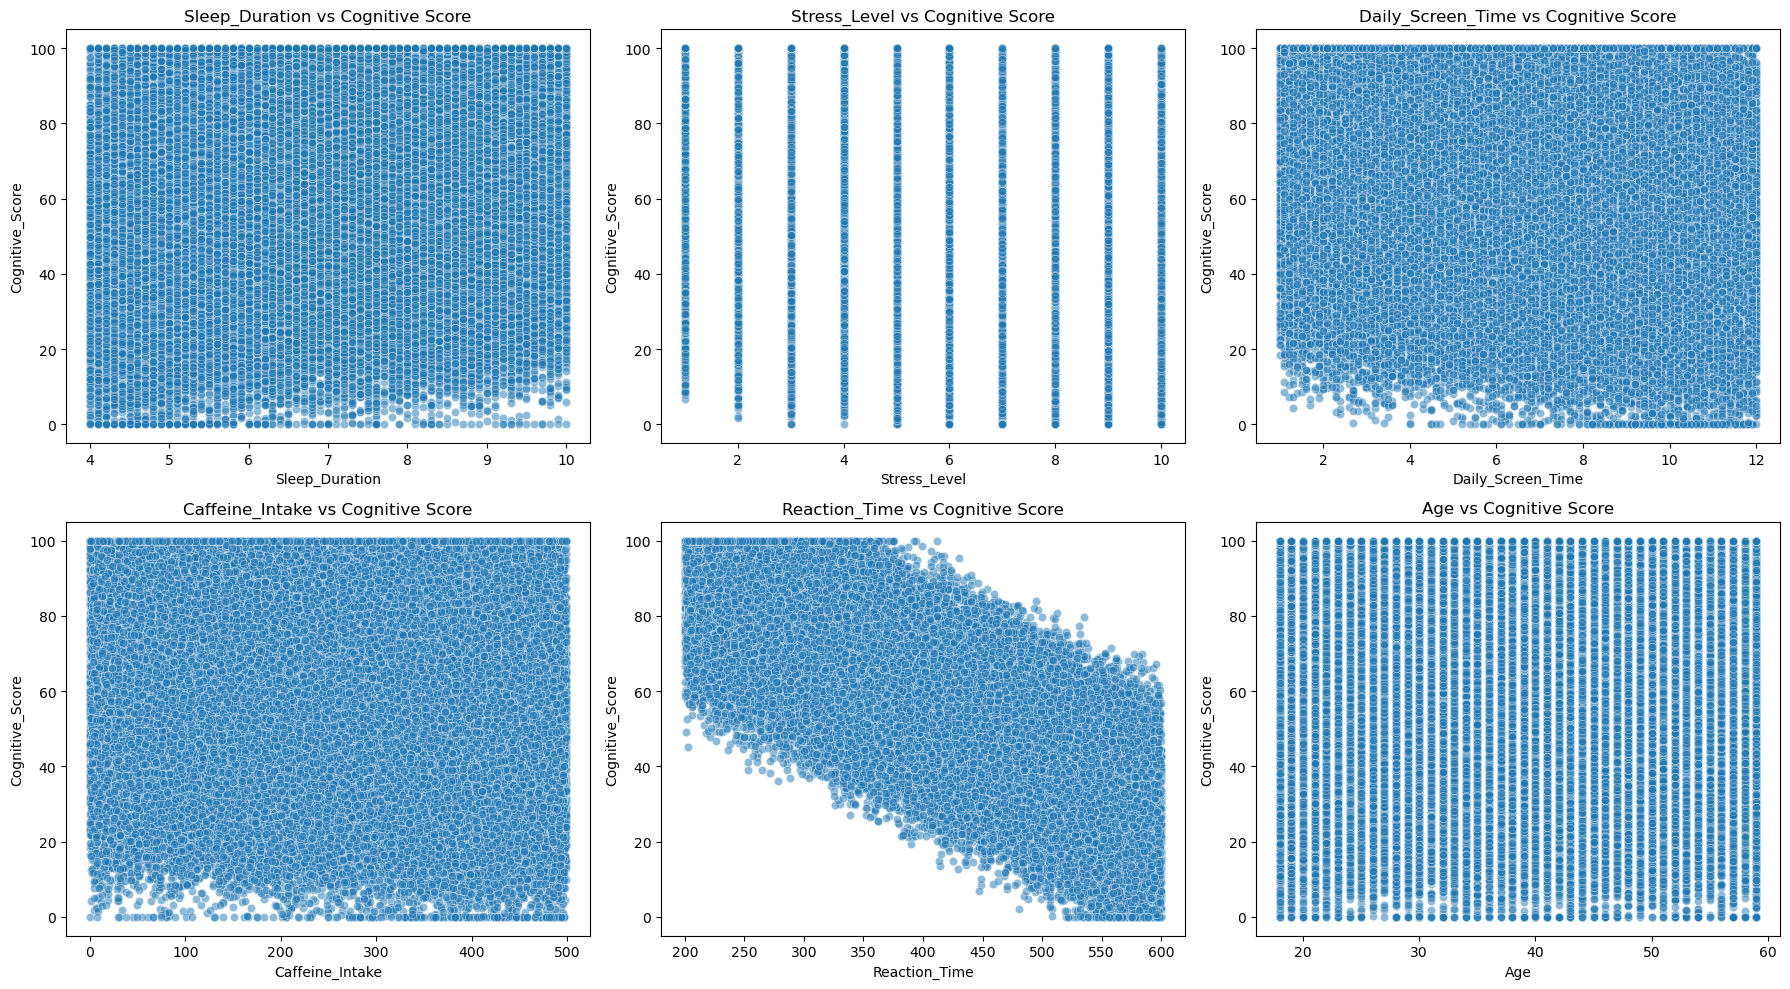

In [123]:
# Scatter plots for numerical features
num_cols = ['Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time', 'Age']
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(num_cols):
    ax = axs[i // 3, i % 3]
    sns.scatterplot(x=col, y="Cognitive_Score", data=df, ax=ax, alpha=0.5)
    ax.set_title(f"{col} vs Cognitive Score")
plt.tight_layout()
plt.show()

In [124]:
# Create age group bins
#df['Age_Group'] = pd.cut(df['Age'], bins=[17, 25, 35, 50, 65], labels=['18-25', '26-35', '36-50', '51-65'])

In [130]:
df.drop(columns='AI_Predicted_Score', inplace=True)

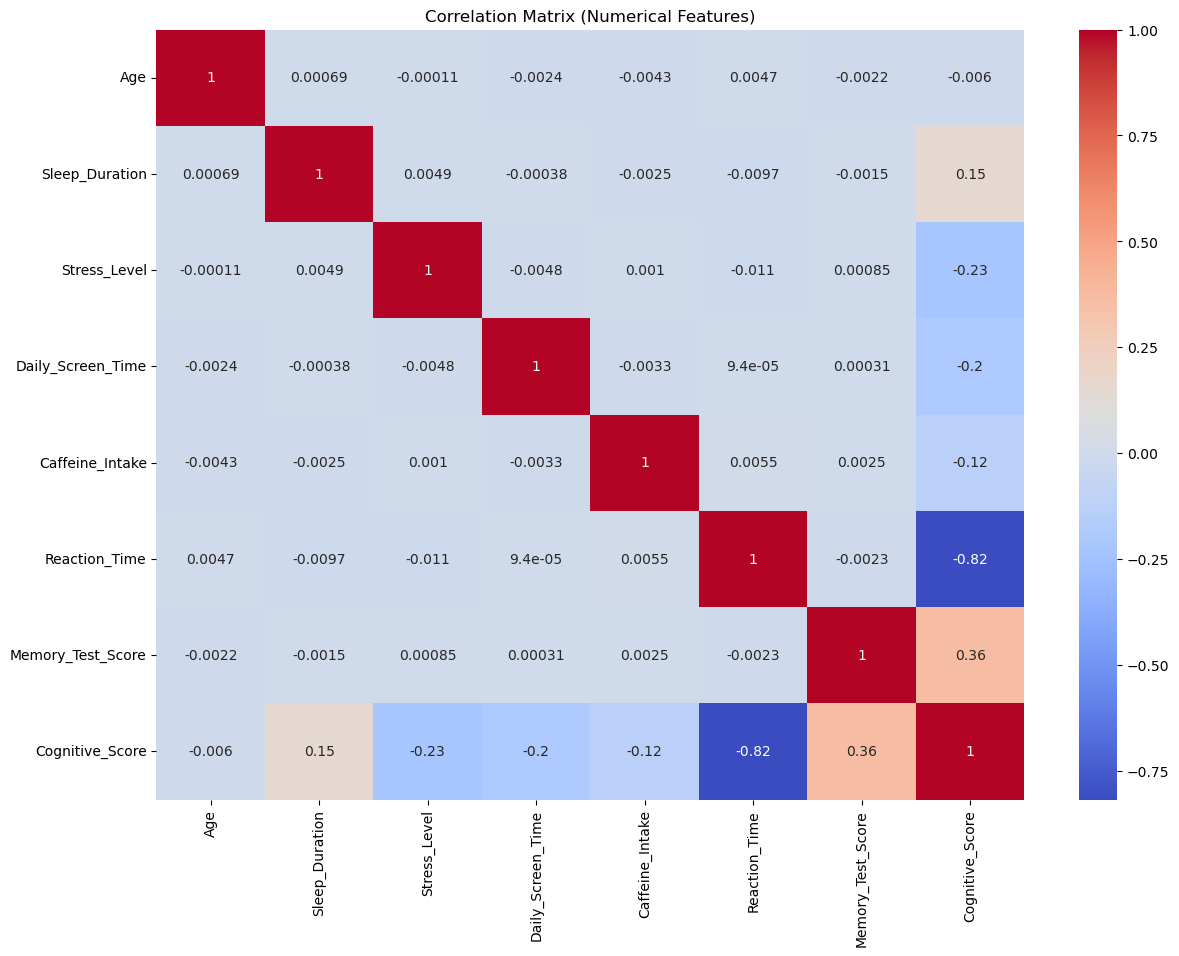

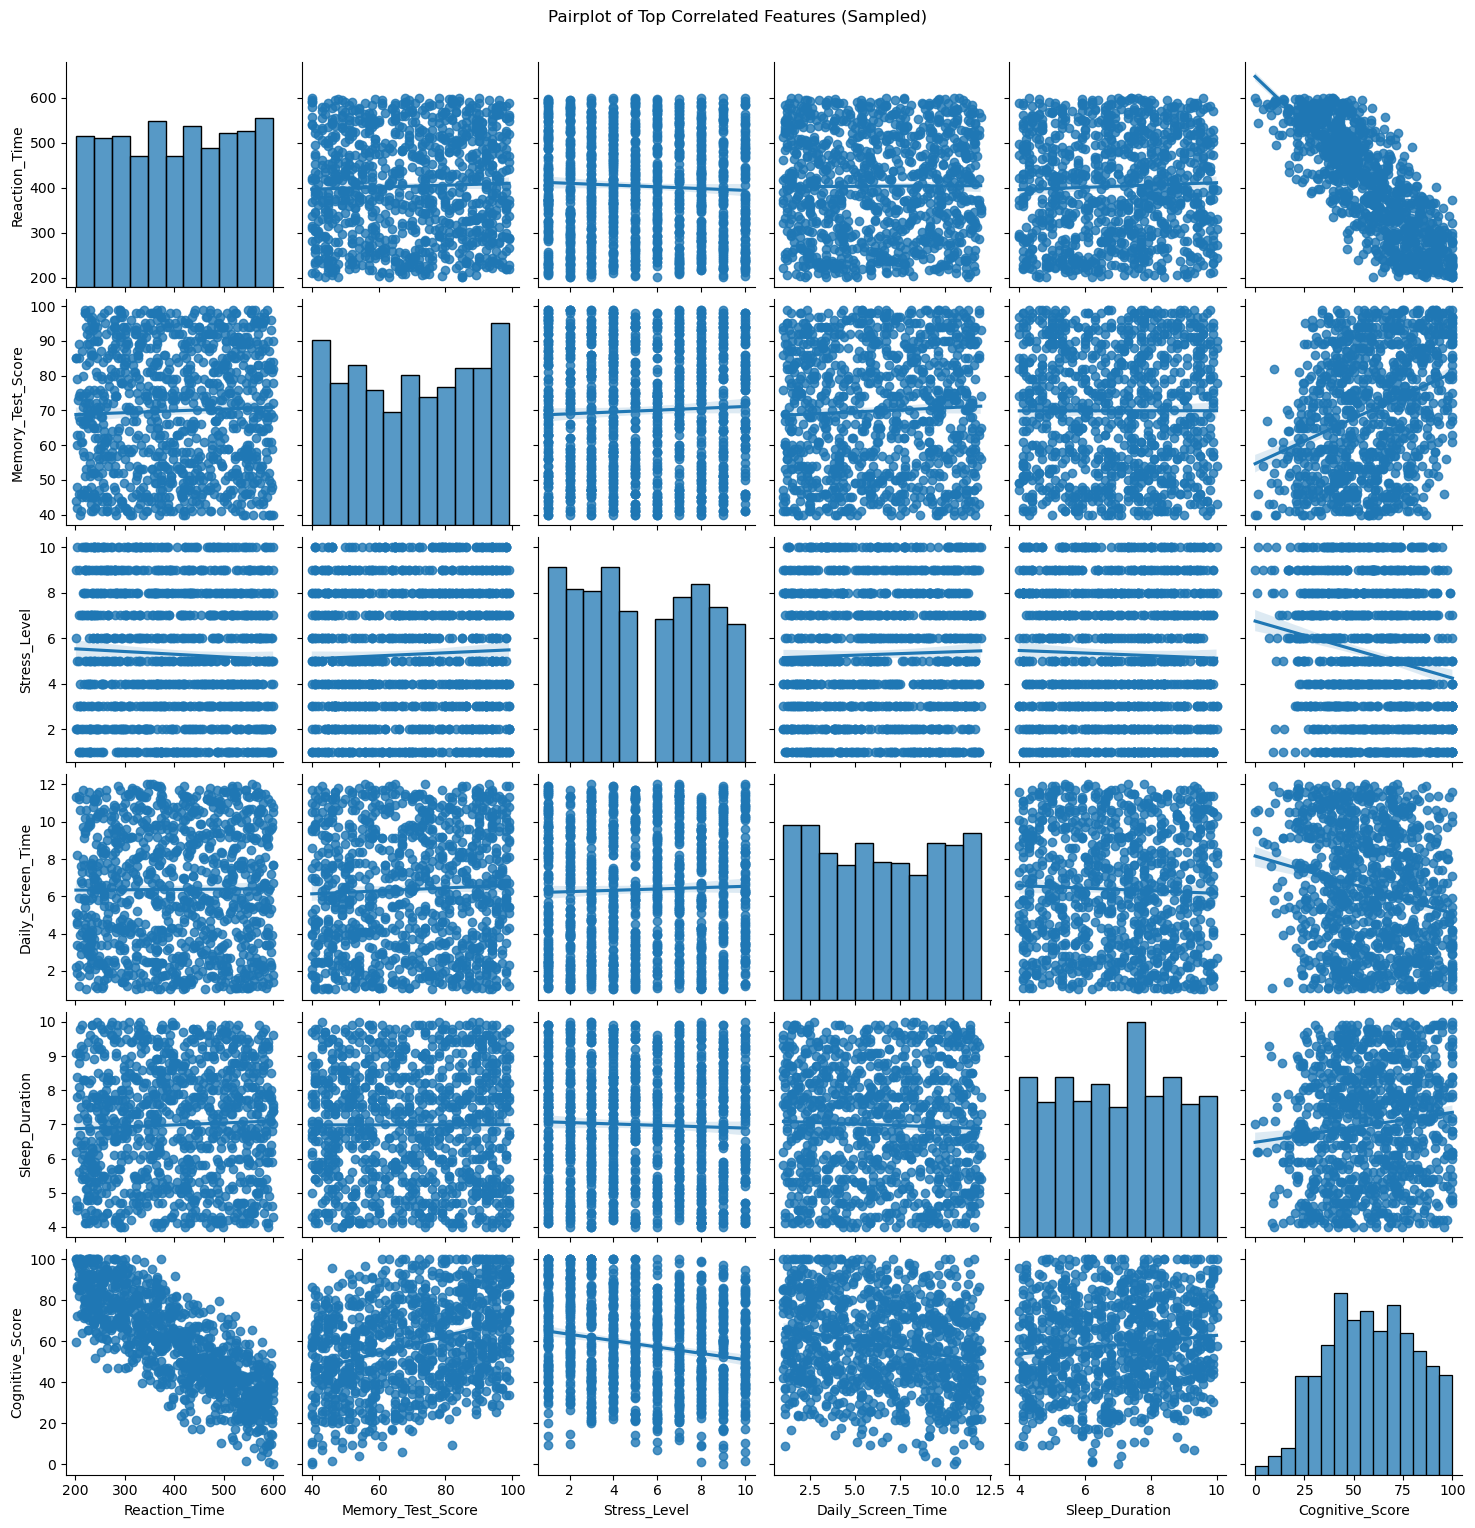


🔹 Linear Regression:
R²: 0.9956
RMSE: 1.5210

🔹 Random Forest:
R²: 0.9879
RMSE: 2.5232


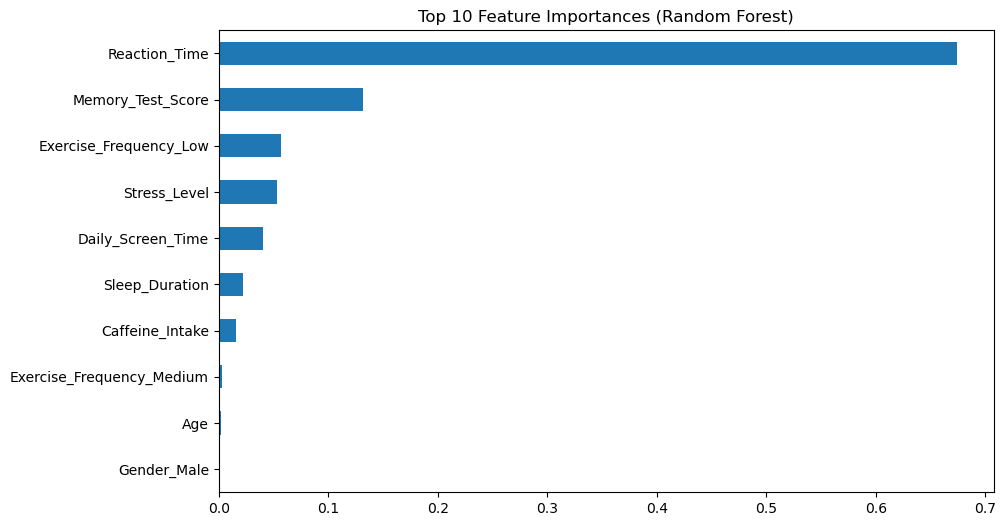


🔹 XGBoost:
R²: 0.9948
RMSE: 1.6477


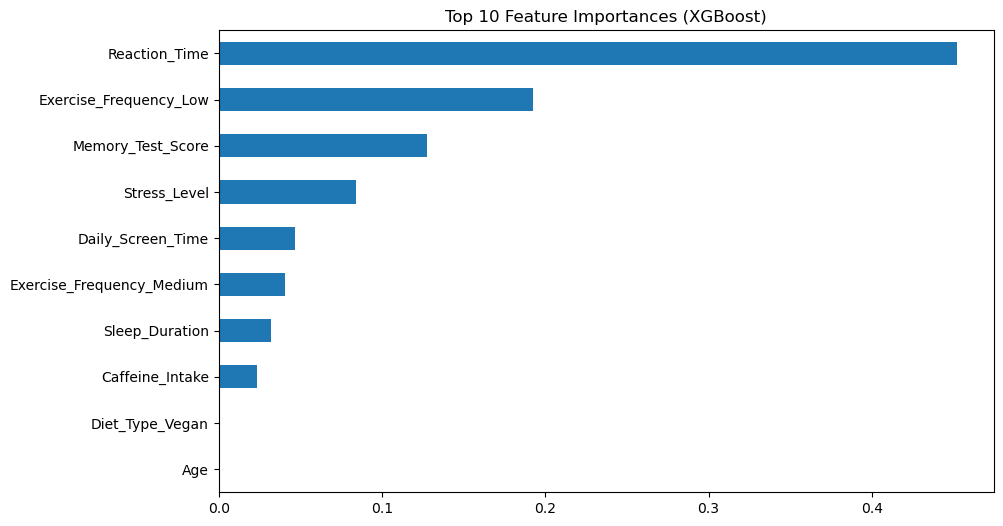


 Top correlated features with Cognitive Score:
Reaction_Time        0.818470
Memory_Test_Score    0.363894
Stress_Level         0.227639
Daily_Screen_Time    0.198515
Sleep_Duration       0.150595
Name: Cognitive_Score, dtype: float64

 Pipeline Complete!


In [131]:

# DROP HIGH-CARDINALITY CATEGORICALS
cat_cols = df.select_dtypes(include='object').columns

# Inspect categorical cardinality
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Drop high-cardinality 
high_card_cols = [col for col in cat_cols if df[col].nunique() > 100]
df.drop(columns=high_card_cols, inplace=True)

#  DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

# CORRELATION MATRIX
numeric_df = df.select_dtypes(include=[np.number])
target = 'Cognitive_Score'  # adjust this if your target is named differently

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

#   TOP CORRELATED FEATURES
correlations = numeric_df.corr()[target].abs().sort_values(ascending=False)
top_features = correlations[1:6].index.tolist()

# Safe Pairplot (sampled)
sampled_df = numeric_df.sample(n=min(1000, len(numeric_df)), random_state=42)
sns.pairplot(sampled_df, vars=top_features + [target], kind='reg')
plt.suptitle("Pairplot of Top Correlated Features (Sampled)", y=1.02)
plt.show()

#  ENCODE LOW-CARDINALITY CATEGORICAL FEATURES
remaining_cat = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=remaining_cat, drop_first=True)

# MODEL PREP
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n🔹 Linear Regression:")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")

# RANDOM FOREST
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest:")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")

# Feature Importances (Random Forest)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances_rf.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

# XGBOOST
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\n🔹 XGBoost:")
print(f"R²: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")

# Feature Importances (XGBoost)
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances_xgb.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

# INSIGHTS
print("\n Top correlated features with Cognitive Score:")
print(correlations[1:6])

print("\n Pipeline Complete!")


In [128]:
y_shuffled = y.sample(frac=1.0, random_state=42).reset_index(drop=True)
model = LinearRegression().fit(X_train_scaled, y_shuffled[:len(X_train_scaled)])
r2 = model.score(X_test_scaled, y_shuffled[len(X_train_scaled):])
print("R² after shuffling target:", r2)

R² after shuffling target: -8.424001926021774e-05
